In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
sns.set(rc={'figure.figsize':(12,10)})
import sys

In [79]:
pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation
Note: you may need to restart the kernel to use updated packages.


In [5]:
titanic = pd.read_csv('titanic_data.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# data analysis 

# observing the correaltion with different parameters

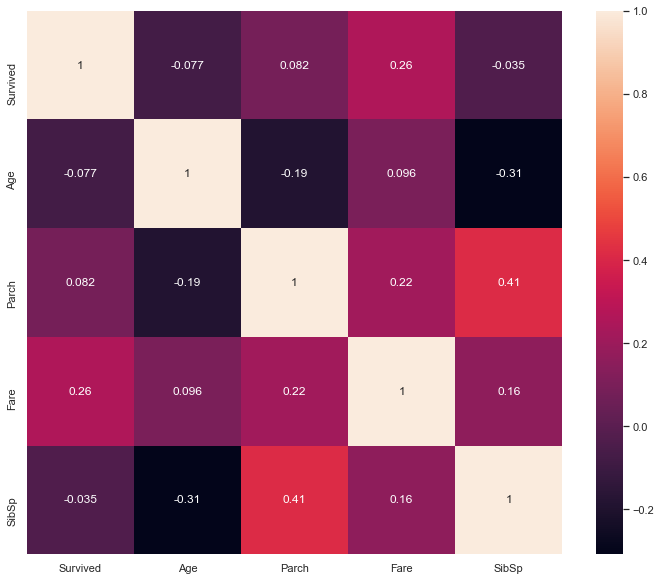

In [11]:
heatmap = sns.heatmap(titanic[["Survived","Age","Parch","Fare","SibSp"]].corr(),annot=True)

In [12]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

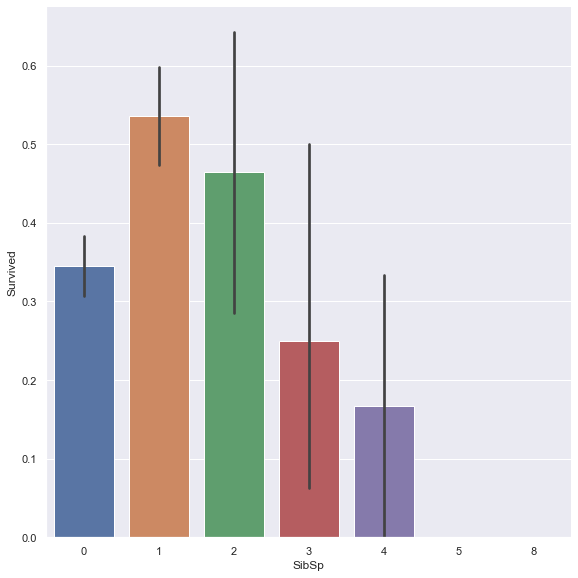

In [19]:
bargraph_sibsp = sns.catplot(x="SibSp",y="Survived",data = titanic , kind = "bar", height = 8)

Conclusion: Passengers having 1 siblings have the highest chances to survive followed by 2 siblings and 0 siblings respectively. 

/home/shakkib/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/shakkib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shakkib/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


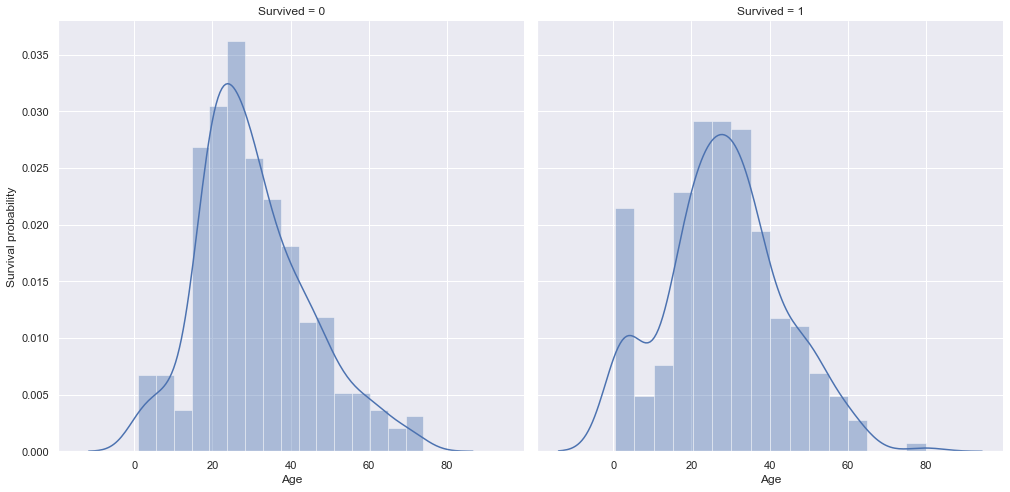

In [22]:
age_visual = sns.FacetGrid(titanic , col="Survived" , size=7)
age_visual = age_visual.map(sns.distplot,"Age")
age_visual = age_visual.set_ylabels("Survival probability")

we have noticed that even if age is not very much correlated with survival of the passengers the age category is a factor in the survival of passengers
The very young passengers have literally more chances to survive

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

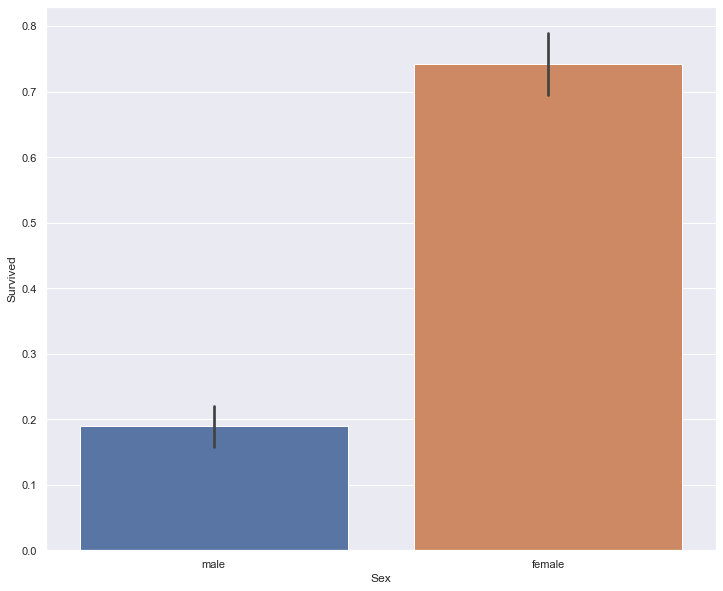

In [23]:
sns.barplot(x="Sex",y="Survived",data=titanic)

In [24]:
titanic[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly noticeable that women and passengers with very young age(children) have the higher chance of survival
its also clearly noticeable by the mean moreover in the titanic movie everyone was saying that women and children first so its a very good intuition

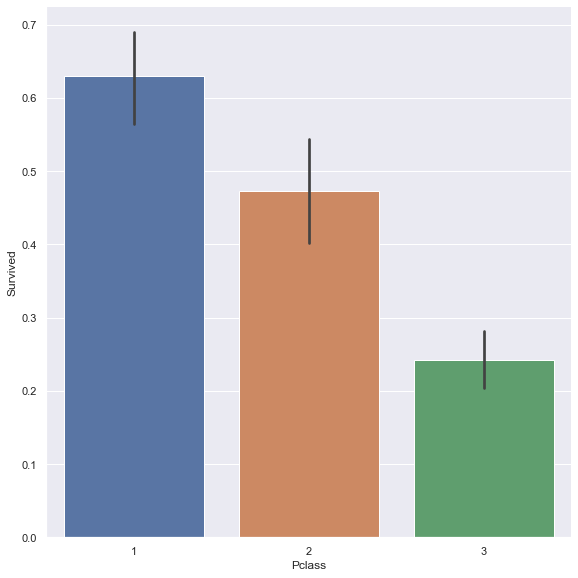

In [28]:
pclass = sns.catplot(x="Pclass",y="Survived",data = titanic,kind="bar",height=8)

again clearly visible that the class higher the chances to survive

# Pclass vs Survival by sex

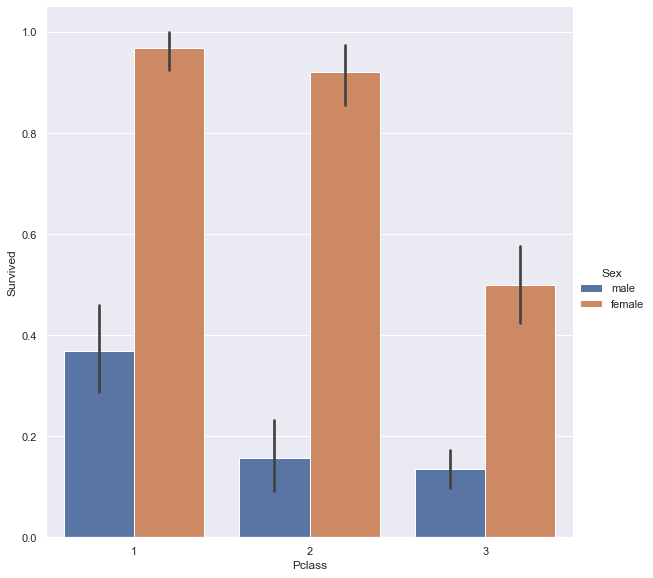

In [30]:
vs = sns.catplot(x="Pclass",y="Survived",hue="Sex",data = titanic,height = 8,kind = "bar")

# Embarked

In [32]:
titanic["Embarked"].isnull().sum()

2

filling the null values with mode means the most frequent values

In [35]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

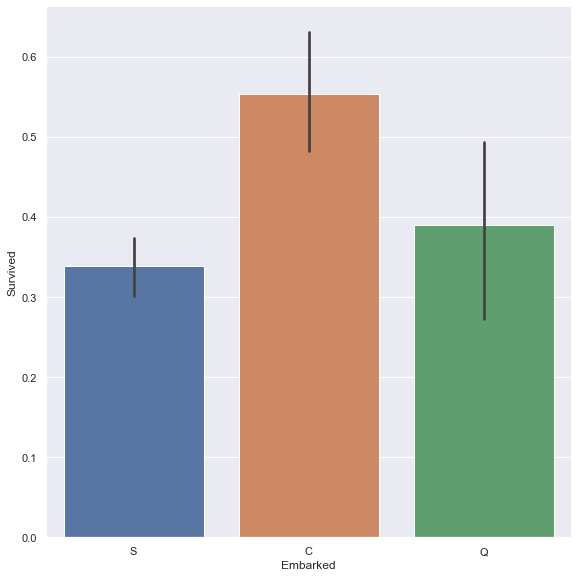

In [37]:
a = sns.catplot(x="Embarked",y="Survived",data = titanic,height = 8,kind = "bar")

Passengers coming from cherbourg(C) have high chances to survive
Lets find the reason people from C having higher chances to survive

/home/shakkib/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


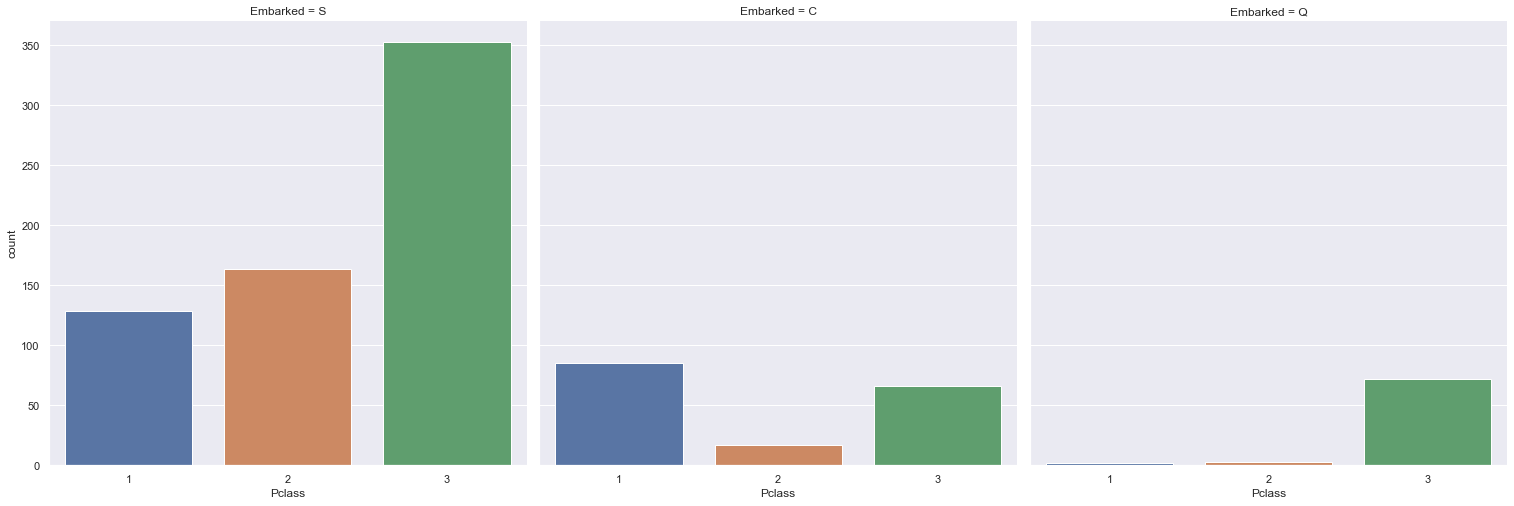

In [41]:
b = sns.catplot("Pclass",col="Embarked",data = titanic,height = 7,kind = "count")

We can clearly see that passengers from C having 1st class ticket so obviously the survival chances would be higher

In [42]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and embarked having null values

In [52]:
mean = titanic["Age"].mean()
std = titanic["Age"].std()
is_null = titanic["Age"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice = titanic["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["Age"]=age_slice

In [53]:
is_null

0

In [46]:
mean

29.69911764705882

In [47]:
std

14.526497332334042

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
col_to_drop = ["PassengerId","Ticket","Name","Cabin"]
titanic.drop(col_to_drop,axis=1,inplace=True)

In [59]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
genders = {"male":0,"female":1}
titanic["Sex"] = titanic["Sex"].map(genders)

In [62]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [63]:
ports = {"S":0,"C":1,"Q":2}
titanic["Embarked"] = titanic["Embarked"].map(ports)

In [65]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,43.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


# Data Splitting

In [66]:
x = titanic.drop(titanic.columns[[0]],axis=1)
y = titanic["Survived"]

In [67]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [127]:
x_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,0,30.0,0,0,14.4583,1
648,3,0,23.0,0,0,7.5500,0
278,3,0,7.0,4,1,29.1250,2
31,1,1,20.0,1,0,146.5208,1
255,3,1,29.0,0,2,15.2458,1
298,1,0,24.0,0,0,30.5000,0
609,1,1,40.0,0,0,153.4625,0
318,1,1,31.0,0,2,164.8667,0
484,1,0,25.0,1,0,91.0792,1
367,3,1,31.0,0,0,7.2292,1


# Feature Scaling

In [133]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# Classification

In [134]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()


In [135]:
logreg.fit(x_train,y_train)
svc_classifier.fit(x_train,y_train)
dt_classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [136]:
logreg_pred = logreg.predict(x_test)
svc_classifier_pred = svc_classifier.predict(x_test)
dt_classifier_pred = dt_classifier.predict(x_test)
knn_classifier_pred = knn_classifier.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_test,logreg_pred)

0.8134328358208955

In [139]:
accuracy_score(y_test,svc_classifier_pred)

0.8134328358208955

In [140]:
accuracy_score(y_test,knn_classifier_pred)

0.7835820895522388

In [141]:
accuracy_score(y_test,dt_classifier_pred)

0.7611940298507462